In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv(r"/kaggle/input/feature-common-language/audio_features_partial.csv")
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label,file_path
0,0.712224,0.055740,2989.050985,2193.800068,5666.294643,0.275144,-202.32579,27.614292,4.094784,5.301181,...,4.752774,-0.985637,-6.752584,-4.679379,-5.478848,-0.866508,-1.919669,-0.634521,Arabic,/kaggle/input/preprocess-common-language/proce...
1,0.598403,0.074004,2372.315827,2065.561020,4795.649510,0.178041,-137.41476,59.931843,5.077963,-5.712012,...,-12.469353,-2.134825,-10.989368,-1.460541,-4.485021,-0.408789,-8.211143,-5.170048,Arabic,/kaggle/input/preprocess-common-language/proce...
2,0.756316,0.046051,3274.178654,2196.474265,5870.572917,0.353054,-233.02031,22.691550,10.057923,3.829097,...,-1.657243,-5.409642,-4.017134,-6.744406,-1.697630,-0.387302,0.829549,1.292110,Arabic,/kaggle/input/preprocess-common-language/proce...
3,0.588983,0.061376,1948.418292,2049.242741,4186.921296,0.137682,-199.04490,80.806870,31.451380,-1.297673,...,-4.202263,0.065943,-9.312079,-7.164060,-3.082040,-8.046175,-3.083879,-2.018449,Arabic,/kaggle/input/preprocess-common-language/proce...
4,0.647222,0.069638,1705.618989,1824.714129,3730.709877,0.095540,-325.47556,92.373820,17.725632,31.867613,...,3.169903,4.538502,-1.073114,-1.204524,-0.108214,-4.803460,-2.882802,-1.455632,Arabic,/kaggle/input/preprocess-common-language/proce...


In [4]:
df.duplicated().sum()

0

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder with your actual labels
label_encoder.fit(df['label'])

# Transform actual labels to numeric labels
df['numeric_labels'] = label_encoder.transform(df['label'])

In [6]:
X = df.drop(columns=['label','numeric_labels','file_path'])
y = df['numeric_labels']

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
from collections import Counter

# Jumlah kelas sebelum SMOTE
print("Jumlah kelas sebelum SMOTE:")
print(Counter(y))

# Jumlah kelas setelah SMOTE
print("\nJumlah kelas setelah SMOTE:")
print(Counter(y_resampled))

Jumlah kelas sebelum SMOTE:
Counter({2: 3570, 39: 3177, 19: 3012, 6: 3003, 27: 2955, 41: 2784, 24: 2766, 0: 2751, 20: 2733, 37: 2691, 10: 2550, 33: 2547, 18: 2520, 21: 2484, 42: 2472, 8: 2442, 40: 2367, 26: 2331, 30: 2283, 28: 2277, 23: 2268, 32: 2238, 7: 2202, 31: 2196, 43: 2181, 15: 2073, 44: 2073, 5: 2016, 34: 1977, 9: 1962, 25: 1947, 12: 1932, 1: 1914, 16: 1890, 29: 1884, 14: 1863, 3: 1830, 17: 1830, 4: 1797, 11: 1773, 35: 1758, 36: 1752, 38: 1737, 22: 1695, 13: 1623})

Jumlah kelas setelah SMOTE:
Counter({0: 3570, 4: 3570, 9: 3570, 27: 3570, 18: 3570, 24: 3570, 23: 3570, 13: 3570, 20: 3570, 11: 3570, 16: 3570, 40: 3570, 28: 3570, 15: 3570, 21: 3570, 8: 3570, 31: 3570, 29: 3570, 5: 3570, 7: 3570, 41: 3570, 44: 3570, 3: 3570, 2: 3570, 14: 3570, 43: 3570, 36: 3570, 26: 3570, 34: 3570, 12: 3570, 37: 3570, 35: 3570, 42: 3570, 33: 3570, 17: 3570, 25: 3570, 6: 3570, 30: 3570, 39: 3570, 22: 3570, 10: 3570, 1: 3570, 19: 3570, 32: 3570, 38: 3570})


In [9]:
### split data 80% 20%

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_resampled)

In [10]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler pada data training dan transform kedua set data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [11]:
pd.DataFrame(X_train_normalized)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.125270,-0.462618,-0.063722,0.962710,0.546778,-0.530245,-0.215304,-0.176643,1.412404,0.383635,...,0.193716,0.060471,0.656303,-0.022266,0.317852,-0.352507,-1.010202,-1.367641,-1.260068,-1.444051
1,-0.447086,-0.164635,-0.081286,0.298297,0.031393,-0.255482,0.851859,-0.201491,-0.137365,0.157049,...,-1.101902,-1.626334,0.223691,0.817619,-1.296437,-0.614610,-0.134165,-3.339167,-0.671473,0.503199
2,-0.136721,0.693945,-0.652197,0.593003,-0.029296,-1.373536,0.804041,0.107182,0.606830,0.598271,...,-0.054259,-1.238785,-1.046840,-2.431179,-2.554992,-2.492506,-0.366025,-0.626432,0.076768,0.491064
3,-1.041236,1.421366,-0.560796,0.131813,-0.337850,-0.264703,0.680879,-0.053193,0.069079,0.717965,...,-1.921328,0.441973,0.176668,-2.161943,0.177355,0.315965,-1.888467,0.640302,0.116856,-1.150069
4,-0.923043,-0.815273,0.428687,0.336918,0.459523,0.063171,0.295056,-0.775594,-1.244932,-2.012682,...,0.224048,0.497766,0.512246,-0.309098,-0.438342,0.097450,0.281906,0.694139,0.955619,-1.263811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128515,-1.069659,0.820296,-1.411504,-1.652472,-1.413538,-0.950462,-2.531171,1.026397,-0.282676,2.174811,...,-1.828143,0.285871,0.049287,0.720958,0.020781,-1.278091,-0.628007,0.212564,-1.642634,-2.222433
128516,0.000360,-0.463296,-0.023205,0.176157,-0.034989,-0.226584,0.809894,-0.064593,-0.741426,-1.760898,...,0.442690,0.649209,-0.596835,-1.256466,-0.773914,-1.425531,-1.128419,-0.704997,-0.171163,0.474619
128517,-2.370420,1.866536,-1.352947,-1.059491,-1.572022,-0.799900,-0.373726,1.257349,0.578946,0.872449,...,0.865331,-0.488842,0.075970,0.050136,-1.373727,0.271099,-0.194054,-0.750243,-1.434839,0.372517
128518,0.146890,-0.653630,0.677426,0.721152,0.754992,0.370645,0.048390,-0.953738,0.222994,0.610338,...,-0.512452,-1.230825,0.102356,0.297172,-0.461706,-1.169560,-0.183656,0.060295,0.011697,0.617881


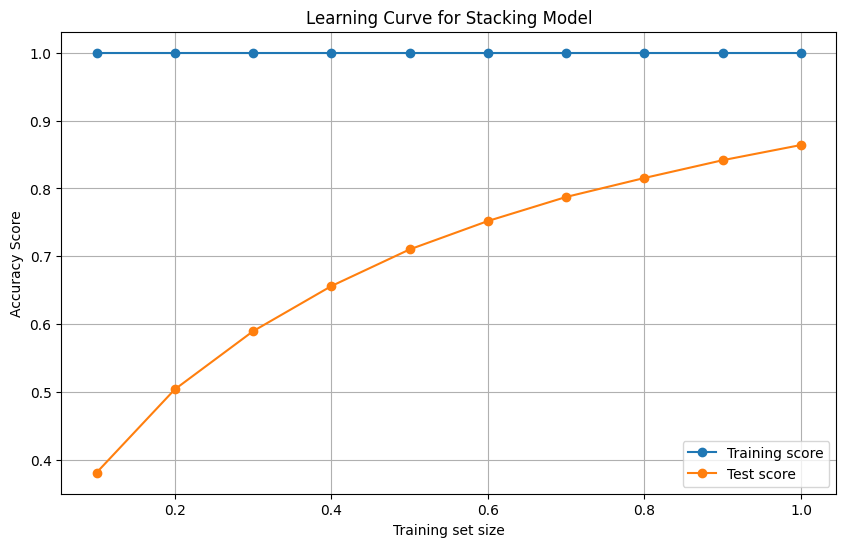

Final Stacking Model Accuracy: 0.86337


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Asumsikan X_train_normalized, X_test_normalized, y_train, dan y_test sudah ada

def get_stacking_prediction(X_train_subset, y_train_subset, X_val):
    # Base models
    rf = RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='log2',
        max_depth=None,
        bootstrap=False,
        random_state=42
    )
    knn = KNeighborsClassifier(
        n_neighbors=1,
        algorithm='auto', 
        metric='manhattan', 
        p=2, 
        weights='distance'
    )
    dt = DecisionTreeClassifier(
        criterion='entropy', 
        max_depth=None, 
        max_features=None, 
        min_samples_leaf=1, 
        min_samples_split=2
    )
    lda = LinearDiscriminantAnalysis()
    
    # Final estimator
    final_estimator = LogisticRegression(multi_class='multinomial', max_iter=2000)
    
    # Fit base models
    rf.fit(X_train_subset, y_train_subset)
    knn.fit(X_train_subset, y_train_subset)
    dt.fit(X_train_subset, y_train_subset)
    lda.fit(X_train_subset, y_train_subset)
    
    # Get predictions for validation data
    rf_val = rf.predict_proba(X_val)
    knn_val = knn.predict_proba(X_val)
    dt_val = dt.predict_proba(X_val)
    lda_val = lda.predict_proba(X_val)
    
    # Combine validation predictions
    X_val_meta = np.hstack([rf_val, knn_val, dt_val, lda_val])
    
    # Fit final estimator on training data
    rf_train = rf.predict_proba(X_train_subset)
    knn_train = knn.predict_proba(X_train_subset)
    dt_train = dt.predict_proba(X_train_subset)
    lda_train = lda.predict_proba(X_train_subset)
    X_train_meta = np.hstack([rf_train, knn_train, dt_train, lda_train])
    final_estimator.fit(X_train_meta, y_train_subset)
    
    # Final prediction
    return final_estimator.predict(X_val_meta)

# Generate learning curve data
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for size in train_sizes:
    n_samples = int(len(X_train_normalized) * size)
    X_subset = X_train_normalized[:n_samples]
    y_subset = y_train[:n_samples]
    
    y_pred = get_stacking_prediction(X_subset, y_subset, X_test_normalized)
    test_score = accuracy_score(y_test, y_pred)
    test_scores.append(test_score)
    
    # Untuk train score, kita menggunakan subset yang sama
    y_train_pred = get_stacking_prediction(X_subset, y_subset, X_subset)
    train_score = accuracy_score(y_subset, y_train_pred)
    train_scores.append(train_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.xlabel("Training set size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Stacking Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Final model evaluation
final_pred = get_stacking_prediction(X_train_normalized, y_train, X_test_normalized)
final_accuracy = accuracy_score(y_test, final_pred)
print(f"Final Stacking Model Accuracy: {final_accuracy:.5f}")

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, final_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       714
           1       0.84      0.88      0.86       714
           2       0.91      0.81      0.86       714
           3       0.84      0.86      0.85       714
           4       0.87      0.86      0.86       714
           5       0.84      0.85      0.84       714
           6       0.85      0.70      0.77       714
           7       0.85      0.94      0.89       714
           8       0.88      0.85      0.86       714
           9       0.90      0.92      0.91       714
          10       0.86      0.80      0.83       714
          11       0.85      0.81      0.83       714
          12       0.84      0.87      0.85       714
          13       0.88      0.92      0.90       714
          14       0.86      0.84      0.85       714
          15       0.85      0.91      0.88       714
          16       0.92      0.97      0.95       714
   